In [3]:
from matplotlib import pyplot as plt
import numpy as np
import random

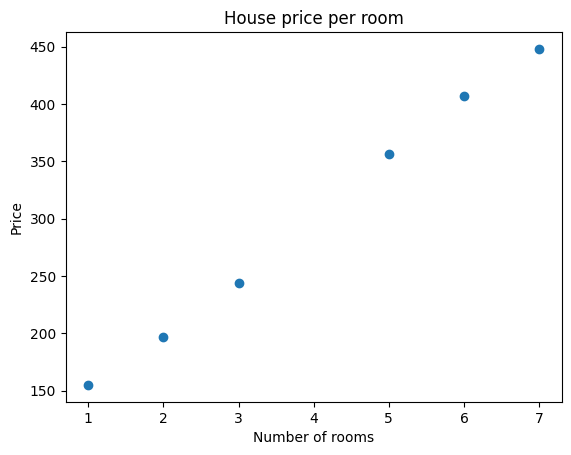

In [4]:
room = np.array([1, 2, 3, 5, 6, 7])
price = np.array([155, 197, 244, 356, 407, 448])
plt.scatter(room, price)
plt.xlabel('Number of rooms')
plt.ylabel('Price')
plt.title('House price per room')
plt.show()

In [5]:
def square_trick(intercept, slope, x, y, learning_rate):
    """"
    This function redefine the slope and intercept by sqaure trick of the linear regression model
    """
    pred_y = slope * x + intercept
    intercept = intercept + learning_rate * (y - pred_y)
    slope = slope + learning_rate * x * (y - pred_y)
    
    return intercept, slope

In [6]:
def absolute_trick(intercept, slope, x, y, learning_rate):
    """"
    This function redefine the slope and intercept by absolute trick of the linear regression model
    """
    pred_y = slope * x + intercept
    if price > pred_y:
        intercept = intercept + learning_rate
        slope = slope + learning_rate * x
    else:
        intercept = intercept - learning_rate
        slope = slope - learning_rate * x
    
    return intercept, slope

In [7]:
def root_mean_square_error(intercept, slope, x, y):
    """
    This function used to calculate the root mean square error
    """
    pred_y = slope * x + intercept
    rmse = np.sqrt(np.mean((pred_y - y) ** 2))
    return rmse

In [21]:
def linear_regression(parameters, result, learning_rate = 0.01, epoches = 1000):
    """
    This function used to predict the value through linear regression model
    """
    slope = random.random()
    intercept = random.random()

    rmse_list = []
    for _ in range(epoches):
        i = random.randint(0, len(parameters) - 1)
        x = parameters[i]
        y = result[i]
        intercept, slope = square_trick(intercept, slope, x, y, learning_rate)
        rmse = root_mean_square_error(intercept, slope, parameters, result)
        rmse_list.append(rmse)
    
    return intercept, slope, rmse


Intercept: 89.78541891793606, Slope: 52.441000731548634


TypeError: object of type 'numpy.float64' has no len()

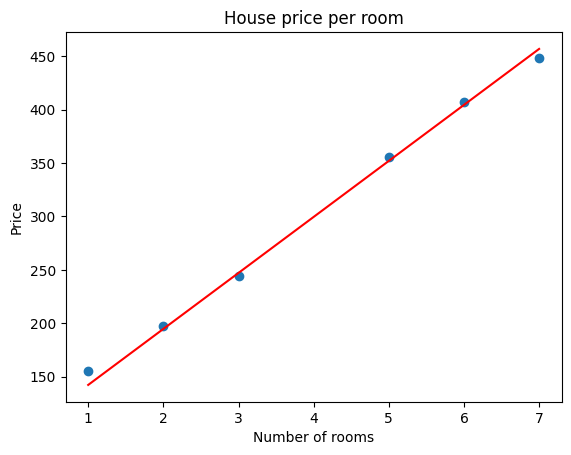

In [22]:
intercept, slope, rmse_list = linear_regression(room, price, learning_rate = 0.001, epoches = 10000)
print(f"Intercept: {intercept}, Slope: {slope}")
plt.plot(room, slope * room + intercept, 'r')
plt.scatter(room, price)
plt.xlabel('Number of rooms')
plt.ylabel('Price')
plt.title('House price per room')
plt.scatter(range(len(rmse_list)), rmse_list)
plt.show()